In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dateutil import parser
import matplotlib.dates as mdates 


In [2]:
#Import data composed of a sample 9757 Tweets 
df=pd.read_excel("Posts from 2018-03-01 to 2018-04-07.xls")
df.head(10)

,Monitor: Trade (03/01/18 - 04/07/18),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Posts,Followers,Following,Post Title,Post Type,Image URL,Object,Scene,Action,Brand
1,977911755669213184,2018-03-25 10:15:05,http://twitter.com/MILadyBirder/status/9779117...,RT @OliviaResists Warmonger John Bolton said h...,@MILadyBirder,Sunshine,United States of America,NaN,NaN,Negative,...,4313,83,295,RT @OliviaResists Warmonger John Bolton said h...,Retweet,http://pbs.twimg.com/media/DZI5KyyVQAIcy8X.jpg,"Cartoon, Drawing",NaN,NaN,NaN
2,971728470484176897,2018-03-08 07:44:55,http://twitter.com/RCGUENTHER/status/971728470...,RT @realDonaldTrump Looking forward to 3:30 P....,@RCGUENTHER,Rosemary Guenther,United States of America,New York,NaN,Positive,...,21407,1366,1377,RT @realDonaldTrump Looking forward to 3:30 P....,Retweet,NaN,NaN,NaN,NaN,NaN
3,971484497031172096,2018-03-07 15:35:28,http://twitter.com/Schenck/status/971484497031...,RT @BarbaraBoxer Payoff to porn actress; Trump...,@Schenck,Stormy Schenck,United States of America,New York,New York,Positive,...,165289,3583,4454,RT @BarbaraBoxer Payoff to porn actress; Trump...,Retweet,NaN,NaN,NaN,NaN,NaN
4,980636832890261504,2018-04-01 22:43:34,http://twitter.com/MarleneGreen/status/9806368...,"RT @Amy_Siskind Oh wow, who could ever guess t...",@MarleneGreen,Marlene Green,United States of America,NaN,NaN,Negative,...,7900,722,1493,"RT @Amy_Siskind Oh wow, who could ever guess t...",Retweet,NaN,NaN,NaN,NaN,NaN
5,975583332481273856,2018-03-19 00:02:46,http://twitter.com/jtao98/status/9755833324812...,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",@jtao98,Ji Tao,United States of America,New York,New York,Negative,...,656,248,395,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",Retweet,NaN,NaN,NaN,NaN,NaN
6,970084681982111744,2018-03-03 18:53:06,http://twitter.com/tommyHotpockets/status/9700...,RT @JuddLegum White House response to Icahn st...,@tommyHotpockets,999 GΩ,United States of America,Michigan,Detroit,Negative,...,8844,7146,7651,RT @JuddLegum White House response to Icahn st...,Retweet,http://pbs.twimg.com/media/DXZgBO7UQAAcCHy.jpg,Circle,NaN,Handwriting,NaN
7,973638660640911360,2018-03-13 15:15:20,http://twitter.com/ModernMetalsMag/status/9736...,South Korea to 'deploy all possible means' to ...,@ModernMetalsMag,Modern Metals,United States of America,Illinois,Chicago,Negative,...,37853,5184,457,South Korea to 'deploy all possible means' to ...,Tweet,NaN,NaN,NaN,NaN,NaN
8,974529629934444544,2018-03-16 02:15:44,http://twitter.com/302BrownSt/status/974529629...,RT @WilDonnelly 1995: Kudlow was fired by the ...,@302BrownSt,Larry Williams,United States of America,Texas,Longview,Positive,...,1090,63,590,RT @WilDonnelly 1995: Kudlow was fired by the ...,Retweet,NaN,NaN,NaN,NaN,NaN
9,973696401669488641,2018-03-13 19:04:47,http://twitter.com/BV/status/973696401669488641,The harm from Trump's tariffs on imported stee...,@BV,Bloomberg View,United States of America,New York,New York,Negative,...,91187,112252,216,The harm from Trump's tariffs on imported stee...,Tweet,http://pbs.twimg.com/media/DYNDt2tVAAAx3MN.jpg,NaN,NaN,Handwriting,NaN


In [3]:
#Clean Data 
df.columns=df.iloc[0]
df=df.drop(df.index[[0]] )
df.head(10)

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Posts,Followers,Following,Post Title,Post Type,Image URL,Object,Scene,Action,Brand
1,977911755669213184,2018-03-25 10:15:05,http://twitter.com/MILadyBirder/status/9779117...,RT @OliviaResists Warmonger John Bolton said h...,@MILadyBirder,Sunshine,United States of America,NaN,NaN,Negative,...,4313,83,295,RT @OliviaResists Warmonger John Bolton said h...,Retweet,http://pbs.twimg.com/media/DZI5KyyVQAIcy8X.jpg,"Cartoon, Drawing",NaN,NaN,NaN
2,971728470484176897,2018-03-08 07:44:55,http://twitter.com/RCGUENTHER/status/971728470...,RT @realDonaldTrump Looking forward to 3:30 P....,@RCGUENTHER,Rosemary Guenther,United States of America,New York,NaN,Positive,...,21407,1366,1377,RT @realDonaldTrump Looking forward to 3:30 P....,Retweet,NaN,NaN,NaN,NaN,NaN
3,971484497031172096,2018-03-07 15:35:28,http://twitter.com/Schenck/status/971484497031...,RT @BarbaraBoxer Payoff to porn actress; Trump...,@Schenck,Stormy Schenck,United States of America,New York,New York,Positive,...,165289,3583,4454,RT @BarbaraBoxer Payoff to porn actress; Trump...,Retweet,NaN,NaN,NaN,NaN,NaN
4,980636832890261504,2018-04-01 22:43:34,http://twitter.com/MarleneGreen/status/9806368...,"RT @Amy_Siskind Oh wow, who could ever guess t...",@MarleneGreen,Marlene Green,United States of America,NaN,NaN,Negative,...,7900,722,1493,"RT @Amy_Siskind Oh wow, who could ever guess t...",Retweet,NaN,NaN,NaN,NaN,NaN
5,975583332481273856,2018-03-19 00:02:46,http://twitter.com/jtao98/status/9755833324812...,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",@jtao98,Ji Tao,United States of America,New York,New York,Negative,...,656,248,395,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",Retweet,NaN,NaN,NaN,NaN,NaN
6,970084681982111744,2018-03-03 18:53:06,http://twitter.com/tommyHotpockets/status/9700...,RT @JuddLegum White House response to Icahn st...,@tommyHotpockets,999 GΩ,United States of America,Michigan,Detroit,Negative,...,8844,7146,7651,RT @JuddLegum White House response to Icahn st...,Retweet,http://pbs.twimg.com/media/DXZgBO7UQAAcCHy.jpg,Circle,NaN,Handwriting,NaN
7,973638660640911360,2018-03-13 15:15:20,http://twitter.com/ModernMetalsMag/status/9736...,South Korea to 'deploy all possible means' to ...,@ModernMetalsMag,Modern Metals,United States of America,Illinois,Chicago,Negative,...,37853,5184,457,South Korea to 'deploy all possible means' to ...,Tweet,NaN,NaN,NaN,NaN,NaN
8,974529629934444544,2018-03-16 02:15:44,http://twitter.com/302BrownSt/status/974529629...,RT @WilDonnelly 1995: Kudlow was fired by the ...,@302BrownSt,Larry Williams,United States of America,Texas,Longview,Positive,...,1090,63,590,RT @WilDonnelly 1995: Kudlow was fired by the ...,Retweet,NaN,NaN,NaN,NaN,NaN
9,973696401669488641,2018-03-13 19:04:47,http://twitter.com/BV/status/973696401669488641,The harm from Trump's tariffs on imported stee...,@BV,Bloomberg View,United States of America,New York,New York,Negative,...,91187,112252,216,The harm from Trump's tariffs on imported stee...,Tweet,http://pbs.twimg.com/media/DYNDt2tVAAAx3MN.jpg,NaN,NaN,Handwriting,NaN
10,978221652159873025,2018-03-26 06:46:31,http://twitter.com/Edwards12Willie/status/9782...,China Warns U.S. It Will Take Measures After T...,@Edwards12Willie,Willie Edwards,United States of America,Washington,Tacoma,Negative,...,18433,1443,1326,China Warns U.S. It Will Take Measures After T...,Tweet,NaN,NaN,NaN,NaN,NaN


In [4]:
#Distinguish between tweets and retweets 
df.describe()
#total 9757 rows
#5360 tweets are unique, which means that the remaining tweets are retweets 

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Posts,Followers,Following,Post Title,Post Type,Image URL,Object,Scene,Action,Brand
count,9757,9757,9757,9757,9757,9757,9757,6575,4268,9757,...,9757,9757,9757,9757,9757,1304,1262,507,799,4
unique,9757,9650,9757,5360,7900,7752,1,51,321,2,...,9077,4802,4163,5363,3,1054,477,132,61,3
top,971498203785789440,2018-03-19 02:57:04,http://twitter.com/Linda_Colo/status/980750745...,RT @RyanAFournier President Trump is about to ...,@politiciandirec,No Fake News! App,United States of America,California,New York,Negative,...,732,1,0,RT @RyanAFournier President Trump is about to ...,Retweet,http://pbs.twimg.com/media/DZI5KyyVQAIcy8X.jpg,"Air Force, Asphalt, Emergency Service, Firefig...",Ceremony,Speech,Nike
freq,1,3,1,2018,64,64,9757,898,738,7202,...,4,31,83,2018,4874,40,43,49,459,2


In [5]:
#Categorize tweets by positive or negative sentiment 

df[df.Category=="Positive"]['GUID'].count()

df[df.Category=='Negative ']['GUID'].count()

df['pre_clean_len'] = [len(t) for t in df.Contents]
df.head(10)

#2555 posts have been categorized as positive tweets and #7202 as negative tweets. 


,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Followers,Following,Post Title,Post Type,Image URL,Object,Scene,Action,Brand,pre_clean_len
1,977911755669213184,2018-03-25 10:15:05,http://twitter.com/MILadyBirder/status/9779117...,RT @OliviaResists Warmonger John Bolton said h...,@MILadyBirder,Sunshine,United States of America,NaN,NaN,Negative,...,83,295,RT @OliviaResists Warmonger John Bolton said h...,Retweet,http://pbs.twimg.com/media/DZI5KyyVQAIcy8X.jpg,"Cartoon, Drawing",NaN,NaN,NaN,276
2,971728470484176897,2018-03-08 07:44:55,http://twitter.com/RCGUENTHER/status/971728470...,RT @realDonaldTrump Looking forward to 3:30 P....,@RCGUENTHER,Rosemary Guenther,United States of America,New York,NaN,Positive,...,1366,1377,RT @realDonaldTrump Looking forward to 3:30 P....,Retweet,NaN,NaN,NaN,NaN,NaN,295
3,971484497031172096,2018-03-07 15:35:28,http://twitter.com/Schenck/status/971484497031...,RT @BarbaraBoxer Payoff to porn actress; Trump...,@Schenck,Stormy Schenck,United States of America,New York,New York,Positive,...,3583,4454,RT @BarbaraBoxer Payoff to porn actress; Trump...,Retweet,NaN,NaN,NaN,NaN,NaN,295
4,980636832890261504,2018-04-01 22:43:34,http://twitter.com/MarleneGreen/status/9806368...,"RT @Amy_Siskind Oh wow, who could ever guess t...",@MarleneGreen,Marlene Green,United States of America,NaN,NaN,Negative,...,722,1493,"RT @Amy_Siskind Oh wow, who could ever guess t...",Retweet,NaN,NaN,NaN,NaN,NaN,276
5,975583332481273856,2018-03-19 00:02:46,http://twitter.com/jtao98/status/9755833324812...,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",@jtao98,Ji Tao,United States of America,New York,New York,Negative,...,248,395,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",Retweet,NaN,NaN,NaN,NaN,NaN,193
6,970084681982111744,2018-03-03 18:53:06,http://twitter.com/tommyHotpockets/status/9700...,RT @JuddLegum White House response to Icahn st...,@tommyHotpockets,999 GΩ,United States of America,Michigan,Detroit,Negative,...,7146,7651,RT @JuddLegum White House response to Icahn st...,Retweet,http://pbs.twimg.com/media/DXZgBO7UQAAcCHy.jpg,Circle,NaN,Handwriting,NaN,273
7,973638660640911360,2018-03-13 15:15:20,http://twitter.com/ModernMetalsMag/status/9736...,South Korea to 'deploy all possible means' to ...,@ModernMetalsMag,Modern Metals,United States of America,Illinois,Chicago,Negative,...,5184,457,South Korea to 'deploy all possible means' to ...,Tweet,NaN,NaN,NaN,NaN,NaN,115
8,974529629934444544,2018-03-16 02:15:44,http://twitter.com/302BrownSt/status/974529629...,RT @WilDonnelly 1995: Kudlow was fired by the ...,@302BrownSt,Larry Williams,United States of America,Texas,Longview,Positive,...,63,590,RT @WilDonnelly 1995: Kudlow was fired by the ...,Retweet,NaN,NaN,NaN,NaN,NaN,292
9,973696401669488641,2018-03-13 19:04:47,http://twitter.com/BV/status/973696401669488641,The harm from Trump's tariffs on imported stee...,@BV,Bloomberg View,United States of America,New York,New York,Negative,...,112252,216,The harm from Trump's tariffs on imported stee...,Tweet,http://pbs.twimg.com/media/DYNDt2tVAAAx3MN.jpg,NaN,NaN,Handwriting,NaN,135
10,978221652159873025,2018-03-26 06:46:31,http://twitter.com/Edwards12Willie/status/9782...,China Warns U.S. It Will Take Measures After T...,@Edwards12Willie,Willie Edwards,United States of America,Washington,Tacoma,Negative,...,1443,1326,China Warns U.S. It Will Take Measures After T...,Tweet,NaN,NaN,NaN,NaN,NaN,82


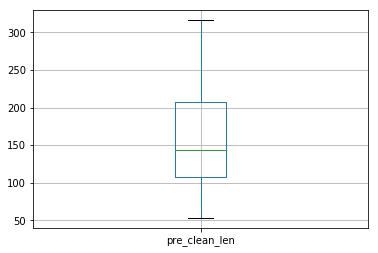

In [6]:
df.boxplot(column=['pre_clean_len'])
plt.show()

In [7]:
df[df.pre_clean_len > 140].head(10)

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Followers,Following,Post Title,Post Type,Image URL,Object,Scene,Action,Brand,pre_clean_len
1,977911755669213184,2018-03-25 10:15:05,http://twitter.com/MILadyBirder/status/9779117...,RT @OliviaResists Warmonger John Bolton said h...,@MILadyBirder,Sunshine,United States of America,NaN,NaN,Negative,...,83,295,RT @OliviaResists Warmonger John Bolton said h...,Retweet,http://pbs.twimg.com/media/DZI5KyyVQAIcy8X.jpg,"Cartoon, Drawing",NaN,NaN,NaN,276
2,971728470484176897,2018-03-08 07:44:55,http://twitter.com/RCGUENTHER/status/971728470...,RT @realDonaldTrump Looking forward to 3:30 P....,@RCGUENTHER,Rosemary Guenther,United States of America,New York,NaN,Positive,...,1366,1377,RT @realDonaldTrump Looking forward to 3:30 P....,Retweet,NaN,NaN,NaN,NaN,NaN,295
3,971484497031172096,2018-03-07 15:35:28,http://twitter.com/Schenck/status/971484497031...,RT @BarbaraBoxer Payoff to porn actress; Trump...,@Schenck,Stormy Schenck,United States of America,New York,New York,Positive,...,3583,4454,RT @BarbaraBoxer Payoff to porn actress; Trump...,Retweet,NaN,NaN,NaN,NaN,NaN,295
4,980636832890261504,2018-04-01 22:43:34,http://twitter.com/MarleneGreen/status/9806368...,"RT @Amy_Siskind Oh wow, who could ever guess t...",@MarleneGreen,Marlene Green,United States of America,NaN,NaN,Negative,...,722,1493,"RT @Amy_Siskind Oh wow, who could ever guess t...",Retweet,NaN,NaN,NaN,NaN,NaN,276
5,975583332481273856,2018-03-19 00:02:46,http://twitter.com/jtao98/status/9755833324812...,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",@jtao98,Ji Tao,United States of America,New York,New York,Negative,...,248,395,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",Retweet,NaN,NaN,NaN,NaN,NaN,193
6,970084681982111744,2018-03-03 18:53:06,http://twitter.com/tommyHotpockets/status/9700...,RT @JuddLegum White House response to Icahn st...,@tommyHotpockets,999 GΩ,United States of America,Michigan,Detroit,Negative,...,7146,7651,RT @JuddLegum White House response to Icahn st...,Retweet,http://pbs.twimg.com/media/DXZgBO7UQAAcCHy.jpg,Circle,NaN,Handwriting,NaN,273
8,974529629934444544,2018-03-16 02:15:44,http://twitter.com/302BrownSt/status/974529629...,RT @WilDonnelly 1995: Kudlow was fired by the ...,@302BrownSt,Larry Williams,United States of America,Texas,Longview,Positive,...,63,590,RT @WilDonnelly 1995: Kudlow was fired by the ...,Retweet,NaN,NaN,NaN,NaN,NaN,292
11,979148407418818563,2018-03-28 20:09:06,http://twitter.com/eric_culwell/status/9791484...,RT @RyanAFournier President Trump is about to ...,@eric_culwell,Eric Culwell,United States of America,Texas,NaN,Positive,...,645,1444,RT @RyanAFournier President Trump is about to ...,Retweet,NaN,NaN,NaN,NaN,NaN,207
12,980989053649612800,2018-04-02 22:03:10,http://twitter.com/sergio_dericks/status/98098...,RT @OMGno2trump Do not underestimate the signi...,@sergio_dericks,Sergio Dericks,United States of America,Nevada,Las Vegas,Negative,...,2203,3414,RT @OMGno2trump Do not underestimate the signi...,Retweet,NaN,NaN,NaN,NaN,NaN,292
13,982125015704322050,2018-04-06 01:17:05,http://twitter.com/HaroldLang16/status/9821250...,RT @realDonaldTrump The Fake News Washington P...,@HaroldLang16,Harold Lang,United States of America,NaN,NaN,Positive,...,1199,1676,RT @realDonaldTrump The Fake News Washington P...,Retweet,NaN,NaN,NaN,NaN,NaN,296


In [8]:
#Clean text encoded in UTF-8, HTML Encoding. Also clean text of ‘@’mention, URL links, and hashtags. 
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
   
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [9]:
testing = df.Contents[:9757]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
df['cleaned_text']=test_result
df.head(10)

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,...,Following,Post Title,Post Type,Image URL,Object,Scene,Action,Brand,pre_clean_len,cleaned_text
1,977911755669213184,2018-03-25 10:15:05,http://twitter.com/MILadyBirder/status/9779117...,RT @OliviaResists Warmonger John Bolton said h...,@MILadyBirder,Sunshine,United States of America,NaN,NaN,Negative,...,295,RT @OliviaResists Warmonger John Bolton said h...,Retweet,http://pbs.twimg.com/media/DZI5KyyVQAIcy8X.jpg,"Cartoon, Drawing",NaN,NaN,NaN,276,rt warmonger john bolton said he thinks tariff...
2,971728470484176897,2018-03-08 07:44:55,http://twitter.com/RCGUENTHER/status/971728470...,RT @realDonaldTrump Looking forward to 3:30 P....,@RCGUENTHER,Rosemary Guenther,United States of America,New York,NaN,Positive,...,1377,RT @realDonaldTrump Looking forward to 3:30 P....,Retweet,NaN,NaN,NaN,NaN,NaN,295,rt looking forward to p m meeting today at the...
3,971484497031172096,2018-03-07 15:35:28,http://twitter.com/Schenck/status/971484497031...,RT @BarbaraBoxer Payoff to porn actress; Trump...,@Schenck,Stormy Schenck,United States of America,New York,New York,Positive,...,4454,RT @BarbaraBoxer Payoff to porn actress; Trump...,Retweet,NaN,NaN,NaN,NaN,NaN,295,rt payoff to porn actress trump confidante sel...
4,980636832890261504,2018-04-01 22:43:34,http://twitter.com/MarleneGreen/status/9806368...,"RT @Amy_Siskind Oh wow, who could ever guess t...",@MarleneGreen,Marlene Green,United States of America,NaN,NaN,Negative,...,1493,"RT @Amy_Siskind Oh wow, who could ever guess t...",Retweet,NaN,NaN,NaN,NaN,NaN,276,rt siskind oh wow who could ever guess that ch...
5,975583332481273856,2018-03-19 00:02:46,http://twitter.com/jtao98/status/9755833324812...,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",@jtao98,Ji Tao,United States of America,New York,New York,Negative,...,395,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",Retweet,NaN,NaN,NaN,NaN,NaN,193,rt the us chamber of commerce the world s larg...
6,970084681982111744,2018-03-03 18:53:06,http://twitter.com/tommyHotpockets/status/9700...,RT @JuddLegum White House response to Icahn st...,@tommyHotpockets,999 GΩ,United States of America,Michigan,Detroit,Negative,...,7651,RT @JuddLegum White House response to Icahn st...,Retweet,http://pbs.twimg.com/media/DXZgBO7UQAAcCHy.jpg,Circle,NaN,Handwriting,NaN,273,rt white house response to icahn stock dump is...
7,973638660640911360,2018-03-13 15:15:20,http://twitter.com/ModernMetalsMag/status/9736...,South Korea to 'deploy all possible means' to ...,@ModernMetalsMag,Modern Metals,United States of America,Illinois,Chicago,Negative,...,457,South Korea to 'deploy all possible means' to ...,Tweet,NaN,NaN,NaN,NaN,NaN,115,south korea to deploy all possible means to fi...
8,974529629934444544,2018-03-16 02:15:44,http://twitter.com/302BrownSt/status/974529629...,RT @WilDonnelly 1995: Kudlow was fired by the ...,@302BrownSt,Larry Williams,United States of America,Texas,Longview,Positive,...,590,RT @WilDonnelly 1995: Kudlow was fired by the ...,Retweet,NaN,NaN,NaN,NaN,NaN,292,rt kudlow was fired by the national review for...
9,973696401669488641,2018-03-13 19:04:47,http://twitter.com/BV/status/973696401669488641,The harm from Trump's tariffs on imported stee...,@BV,Bloomberg View,United States of America,New York,New York,Negative,...,216,The harm from Trump's tariffs on imported stee...,Tweet,http://pbs.twimg.com/media/DYNDt2tVAAAx3MN.jpg,NaN,NaN,Handwriting,NaN,135,the harm from trump s tariffs on imported stee...
10,978221652159873025,2018-03-26 06:46:31,http://twitter.com/Edwards12Willie/status/9782...,China Warns U.S. It Will Take Measures After T...,@Edwards12Willie,Willie Edwards,United States of America,Washington,Tacoma,Negative,...,1326,China Warns U.S. It Will Take Measures After T...,Tweet,NaN,NaN,NaN,NaN,NaN,82,china warns u s it will take measures after tr...


In [10]:
#VADER Sentimental Analysis 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Divide data into negative and positive sentiment dataframes to check for VADER's accuracy. 
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("VADER Sentiment looks interesting, I have high hopes!")
print(vs)


{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.6996}


In [11]:
#Positive score accuracy 

pos_count = 0
pos_correct = 0
positive=df[df.Category=="Positive"]
negative=df[df.Category=="Negative "]

for index, row in positive.iterrows():
        line=row['cleaned_text']
        vs = analyzer.polarity_scores(line)
        if vs['compound'] > 0:
            pos_correct += 1
        pos_count +=1
print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))

Positive accuracy = 20.82191780821918% via 2555 samples


In [12]:
#Negative score accuracy 
neg_count = 0
neg_correct = 0
for index, row in negative.iterrows():
        line=row['cleaned_text']
        vs = analyzer.polarity_scores(line)
        if vs['compound'] <= 0:
            neg_correct += 1
        neg_count +=1
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))


Negative accuracy = 72.36878644820884% via 7202 samples


In [13]:
#Change sample size to get enough accuracy for positive and negative reviews

# 1. If compound score of a tweet  between 0.5 and -0.5 then it is neutral
# 2. If  tweet is not neutral and it's score is above 0.5 then the tweet is positive tweet
# 3. If the tweet is not neutral and it's score is below 0.5 then check for positive and negative values of the tweet
#    if tweet negative value is larger than the tweet positive value than it is negative otherwise it is also neutral

pos_count = 0
pos_correct = 0

threshold = 0.5
for index, row in positive.iterrows():
        line=row['cleaned_text']
        vs = analyzer.polarity_scores(line)
        if vs['compound'] >= threshold or vs['compound'] <= -threshold:
            if vs['compound'] > 0.0:
                pos_correct += 1
            pos_count +=1
neg_count = 0
neg_correct = 0

for index, row in negative.iterrows():
        line=row['cleaned_text']
        vs = analyzer.polarity_scores(line)
        if vs['compound'] >= threshold or vs['compound'] <= -threshold:
            if vs['compound'] <= 0.0:
                if not vs['pos'] > 0.1:
                    if vs['pos']-vs['neg'] <= 0:
                        neg_correct += 1
                    neg_count +=1

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))


Positive accuracy = 99.25233644859813% via 535 samples
Negative accuracy = 100.0% via 1201 samples


In [14]:
threshold = 0.5
final_Data_frame=df[['GUID','Date (EST)','Contents','cleaned_text','pre_clean_len']].copy()
testing = df.cleaned_text[:9757]
compound = []
positive = []
negative = []
predicted_result=[]
for t in testing:
    vs = analyzer.polarity_scores(t)
    compound.append(vs['compound'])
    positive.append(vs['pos'])
    negative.append(vs['neg'])
    if vs['compound'] >= threshold or vs['compound'] <= -threshold:
            if vs['compound'] > 0.0:
                predicted_result='positive'
            if vs['compound'] <= 0.0:
                if not vs['pos'] > 0.1:
                    if vs['pos']-vs['neg'] <= 0:
                        predicted_result='negative'
    else: predicted_result='neutral'
final_Data_frame[ 'predicted_result']=predicted_result
final_Data_frame['compound_score']=compound
final_Data_frame['positive_score']=positive
final_Data_frame['negative_score']= [-x for x in negative] 

In [15]:
final_Data_frame.head(10)

,GUID,Date (EST),Contents,cleaned_text,pre_clean_len,predicted_result,compound_score,positive_score,negative_score
1,977911755669213184,2018-03-25 10:15:05,RT @OliviaResists Warmonger John Bolton said h...,rt warmonger john bolton said he thinks tariff...,276,positive,-0.3847,0.142,-0.206
2,971728470484176897,2018-03-08 07:44:55,RT @realDonaldTrump Looking forward to 3:30 P....,rt looking forward to p m meeting today at the...,295,positive,0.9313,0.267,-0.000
3,971484497031172096,2018-03-07 15:35:28,RT @BarbaraBoxer Payoff to porn actress; Trump...,rt payoff to porn actress trump confidante sel...,295,positive,0.6369,0.132,-0.045
4,980636832890261504,2018-04-01 22:43:34,"RT @Amy_Siskind Oh wow, who could ever guess t...",rt siskind oh wow who could ever guess that ch...,276,positive,0.8176,0.179,-0.000
5,975583332481273856,2018-03-19 00:02:46,"RT @ChinaDailyUSA The US Chamber of Commerce, ...",rt the us chamber of commerce the world s larg...,193,positive,0.2732,0.108,-0.072
6,970084681982111744,2018-03-03 18:53:06,RT @JuddLegum White House response to Icahn st...,rt white house response to icahn stock dump is...,273,positive,-0.4588,0.000,-0.108
7,973638660640911360,2018-03-13 15:15:20,South Korea to 'deploy all possible means' to ...,south korea to deploy all possible means to fi...,115,positive,-0.3818,0.000,-0.191
8,974529629934444544,2018-03-16 02:15:44,RT @WilDonnelly 1995: Kudlow was fired by the ...,rt kudlow was fired by the national review for...,292,positive,-0.6369,0.050,-0.149
9,973696401669488641,2018-03-13 19:04:47,The harm from Trump's tariffs on imported stee...,the harm from trump s tariffs on imported stee...,135,positive,-0.2263,0.144,-0.193
10,978221652159873025,2018-03-26 06:46:31,China Warns U.S. It Will Take Measures After T...,china warns u s it will take measures after tr...,82,positive,-0.1027,0.000,-0.149


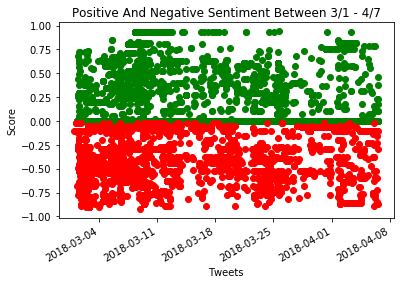

In [16]:
#Plot Graph
plt.title("Positive And Negative Sentiment Between 3/1 - 4/7")
plt.xlabel("Tweets")
plt.ylabel("Score")



plt.plot(final_Data_frame['Date (EST)'].loc[final_Data_frame['compound_score']>=0],final_Data_frame['compound_score'].loc[final_Data_frame['compound_score']>=0], color="green", linewidth=0,marker="o")
plt.plot(final_Data_frame['Date (EST)'].loc[final_Data_frame['compound_score']<0],final_Data_frame['compound_score'].loc [final_Data_frame['compound_score']<0], color="red", linewidth=0,marker="o")

plt.gcf().autofmt_xdate()

plt.show()



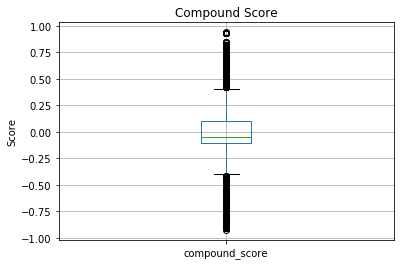

In [17]:
plt.ylabel("Score")
plt.title("Compound Score")
final_Data_frame.boxplot(column=['compound_score'])
plt.show()